1. Started with importing the necessary packages for analysing the data

In [364]:
import sys                                                                      # Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline                                                              

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 
import pandas_profiling  
from scipy import stats

In [365]:
car_sales_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv", encoding='cp1252') 
car_sales_data.head()

car    price       body  mileage  engV engType registration  \
0           Ford  15500.0  crossover       68   2.5     Gas          yes   
1  Mercedes-Benz  20500.0      sedan      173   1.8     Gas          yes   
2  Mercedes-Benz  35000.0      other      135   5.5  Petrol          yes   
3  Mercedes-Benz  17800.0        van      162   1.8  Diesel          yes   
4  Mercedes-Benz  33000.0      vagon       91   NaN   Other          yes   

   year    model  drive  
0  2010     Kuga   full  
1  2011  E-Class   rear  
2  2008   CL 550   rear  
3  2012    B 180  front  
4  2013  E-Class    NaN

2. Imported the Data Set from Git Hub

In [366]:
df = car_sales_data

In [367]:
df.describe(include = 'all')

car          price   body      mileage         engV engType  \
count         9576    9576.000000   9576  9576.000000  9142.000000    9576   
unique          87            NaN      6          NaN          NaN       4   
top     Volkswagen            NaN  sedan          NaN          NaN  Petrol   
freq           936            NaN   3646          NaN          NaN    4379   
mean           NaN   15633.317316    NaN   138.862364     2.646344     NaN   
std            NaN   24106.523436    NaN    98.629754     5.927699     NaN   
min            NaN       0.000000    NaN     0.000000     0.100000     NaN   
25%            NaN    4999.000000    NaN    70.000000     1.600000     NaN   
50%            NaN    9200.000000    NaN   128.000000     2.000000     NaN   
75%            NaN   16700.000000    NaN   194.000000     2.500000     NaN   
max            NaN  547800.000000    NaN   999.000000    99.990000     NaN   

       registration         year    model  drive  
count          9576  9576.000000     9576   9065  
unique            2          NaN      888      3  
top             yes          NaN  E-Class  front  
freq           9015          NaN      199   5188  
mean            NaN  2006.605994      NaN    NaN  
std             NaN     7.067924      NaN    NaN  
min             NaN  1953.000000      NaN    NaN  
25%             NaN  2004.000000      NaN    NaN  
50%             NaN  2008.000000      NaN    NaN  
75%             NaN  2012.000000      NaN    NaN  
max             NaN  2016.000000      NaN    NaN

In [113]:
df.sample(10)

car    price   body  mileage  engV engType registration  year  \
2593  Mercedes-Benz  12100.0  sedan      310   2.2  Diesel          yes  2005   
2115         Toyota  15700.0  sedan      108   NaN  Petrol          yes  2008   
3074     Volkswagen  11500.0  sedan       70   NaN   Other          yes  2014   
4070           Audi   3150.0  sedan       10   2.8  Petrol          yes  1991   
9432           Audi   7600.0  vagon      226   3.0  Diesel           no  2006   
7519     Mitsubishi   1180.0  sedan      280   1.8  Diesel          yes  1986   
7150            BMW  13700.0  sedan      122   2.0  Petrol          yes  2007   
7382           Opel   8500.0  sedan      230   2.2  Petrol          yes  2006   
1757           Ford   6500.0  hatch       97   1.4  Petrol          yes  2008   
9284        Renault  11300.0  vagon      160   1.5  Diesel          yes  2011   

         model  drive  
2593   E-Class   rear  
2115     Camry  front  
3074      Polo  front  
4070       100  front  
9432        A6   full  
7519    Galant  front  
7150       318   rear  
7382  Vectra C  front  
1757    Fusion  front  
9284    Laguna  front

In [10]:
pandas_profiling.ProfileReport(df)

Initial Observations



Dataset has 113 (1.2%) duplicate rows. 
We’ll need to drop the rows as it is a repetition of data and keeping it will hamper the analysis to give incorrect percentages. 

Car and Model has a high cardinality which is fine as those the different types of car brands and the respective car model names which are unique to each manufacturer. 


engV has 434 (4.5%) missing values

The Engine Volume or Displacement has missing values. There is an option of either deleting/dropping those rows or replacing the value with the mode or mean.

Since the engine size is within a certain range we can try replacing the missing values with the mean value here. 

drive has 511 (5.3%) missing values
The drive type of a cat is a unique characteristic based on whether is it a front wheel, rear wheel or all wheel drive. Replacing the missing value with the mode will not be a good idea as an incorrect data input on the drive type will impact the analysis. We will have to drop the rows with missing values for drive. 

price has 267 (2.8%) zeros. 

The price of a car cannot be zero. We will need to consider a value for the price of the car. We can replace the zeros here with the median value of the car price. 

mileage has 348 (3.6%) zeros. 

Mileage cannot be zero. Every car has some mileage when sold. We can replace the zeros with the median or mean value for mileage in the data set. 


Outliers. 



There are a couple of outliers observed in the data frame

Price: Minimum is zero which will get corrected when we replace the zeros in price with the mean/median
The maximum is 547,800. The value seems high. Although half a million dollar cars are available we’ll need to study the data to see if it is a reasonable value for the car in the df or else if we feel that is an incorrect data then we can replace with either mean/median or drop the row. 

Mileage: The minimum value is Zero which we will correct by replacing it wither either mean or median. Similarly the maximum number of 999 also seems to be incorrect which we will replace with either mean/median. 

engV: 

The Engine Volume or displacement or size of the engine has outliers on either side (Min: 0.1, Max: 99.99). We’ll correct it by replacing with either mean or median. 


In [368]:
df.drop_duplicates(subset=None, keep='first', inplace=False)

car    price       body  mileage  engV engType registration  \
0              Ford  15500.0  crossover       68   2.5     Gas          yes   
1     Mercedes-Benz  20500.0      sedan      173   1.8     Gas          yes   
2     Mercedes-Benz  35000.0      other      135   5.5  Petrol          yes   
3     Mercedes-Benz  17800.0        van      162   1.8  Diesel          yes   
4     Mercedes-Benz  33000.0      vagon       91   NaN   Other          yes   
...             ...      ...        ...      ...   ...     ...          ...   
9571        Hyundai  14500.0  crossover      140   2.0     Gas          yes   
9572     Volkswagen   2200.0      vagon      150   1.6  Petrol          yes   
9573  Mercedes-Benz  18500.0  crossover      180   3.5  Petrol          yes   
9574          Lexus  16999.0      sedan      150   3.5     Gas          yes   
9575           Audi  22500.0      other       71   3.6  Petrol          yes   

      year      model  drive  
0     2010       Kuga   full  
1     2011    E-Class   rear  
2     2008     CL 550   rear  
3     2012      B 180  front  
4     2013    E-Class    NaN  
...    ...        ...    ...  
9571  2011     Tucson  front  
9572  1986  Passat B2  front  
9573  2008     ML 350   full  
9574  2008     ES 350  front  
9575  2007         Q7   full  

[9463 rows x 10 columns]

In [369]:
engVmean=df['engV'].mean()

df['engV']=df['engV'].fillna(engVmean)
df['engV'] = np.where(df['engV'] >6.5, engVmean,df['engV'])
df['engV'] = np.where(df['engV'] <0.8, engVmean,df['engV'])

In [370]:
meanprice = df['price'].mean()

In [371]:
df['price'] = np.where(df['price'] >600000, meanprice,df['price'])
df['price'] = np.where(df['price'] <500, meanprice,df['price'])

In [372]:
df.dropna(subset=['drive'], how='all', inplace=True)

In [373]:
mileagemean = float(df['mileage'].mean())
df["mileage"] = np.where(df["mileage"] >200, mean,df["mileage"])
df["mileage"] = np.where(df["mileage"] <10, mean,df["mileage"])

In [374]:
df.describe(include = 'all')

car          price   body      mileage         engV engType  \
count         9065    9065.000000   9065  9065.000000  9065.000000    9065   
unique          83            NaN      6          NaN          NaN       4   
top     Volkswagen            NaN  sedan          NaN          NaN  Petrol   
freq           879            NaN   3444          NaN          NaN    4181   
mean           NaN   16229.737266    NaN   120.169677     2.270587     NaN   
std            NaN   24196.976637    NaN    44.196803     0.942649     NaN   
min            NaN     500.000000    NaN    10.000000     0.800000     NaN   
25%            NaN    5500.000000    NaN    90.000000     1.600000     NaN   
50%            NaN    9900.000000    NaN   139.226365     2.000000     NaN   
75%            NaN   16800.000000    NaN   139.226365     2.646344     NaN   
max            NaN  547800.000000    NaN   200.000000     6.500000     NaN   

       registration         year    model  drive  
count          9065  9065.000000     9065   9065  
unique            2          NaN      863      3  
top             yes          NaN  E-Class  front  
freq           8542          NaN      185   5188  
mean            NaN  2006.638941      NaN    NaN  
std             NaN     7.001318      NaN    NaN  
min             NaN  1953.000000      NaN    NaN  
25%             NaN  2004.000000      NaN    NaN  
50%             NaN  2008.000000      NaN    NaN  
75%             NaN  2012.000000      NaN    NaN  
max             NaN  2016.000000      NaN    NaN

In [196]:
pandas_profiling.ProfileReport(df)

We got the profile report after processing the data. We have cleaned the data frame to remove duplicates and certain rows where there were missing values. We have replaced zeros with mean value in certain fields and have also corrected the outliers by replacing them with mean values.

In [197]:
df.sample(10)

car         price       body     mileage  engV engType  \
9449   Chevrolet   5850.000000      sedan  200.000000   2.0     Gas   
6256         Aro   3600.000000  crossover   43.000000   1.4  Petrol   
6467       Mazda   4700.000000      sedan  139.226365   2.5  Petrol   
3921        Fiat   5800.000000        van  139.226365   1.9  Diesel   
451       Subaru   9700.000000  crossover  139.226365   2.5     Gas   
2350     Renault   8900.000000        van  150.000000   2.0  Diesel   
8044  Mitsubishi   8900.000000      hatch  125.000000   1.8  Petrol   
2757         BMW  10999.000000      sedan  150.000000   2.0     Gas   
6297        Ford   2800.000000        van   70.000000   2.5  Diesel   
7055         BMW  15633.317316  crossover  139.226365   4.4  Petrol   

     registration  year               model  drive  
9449          yes  2007               Epica  front  
6256          yes  1992                  10   full  
6467          yes  1996             Xedos 9  front  
3921          yes  2008         Doblo ãðóç.  front  
451           yes  2006            Forester   full  
2350          yes  2009        Trafic ãðóç.  front  
8044          yes  2009  Lancer X Sportback  front  
2757          yes  2003                 320   rear  
6297          yes  1994       Transit ïàññ.   rear  
7055          yes  2016                X5 M   full

In [269]:
df.head(20)

car          price       body     mileage      engV engType  \
0            Ford   15500.000000  crossover   68.000000  2.500000     Gas   
1   Mercedes-Benz   20500.000000      sedan  173.000000  1.800000     Gas   
2   Mercedes-Benz   35000.000000      other  135.000000  5.500000  Petrol   
3   Mercedes-Benz   17800.000000        van  162.000000  1.800000  Diesel   
5          Nissan   16600.000000  crossover   83.000000  2.000000  Petrol   
6           Honda    6500.000000      sedan  199.000000  2.000000  Petrol   
7         Renault   10500.000000      vagon  185.000000  1.500000  Diesel   
8   Mercedes-Benz   21500.000000      sedan  146.000000  1.800000     Gas   
9   Mercedes-Benz   22700.000000      sedan  125.000000  2.200000  Diesel   
10         Nissan   20447.154000  crossover  139.226365  1.200000  Petrol   
11  Mercedes-Benz   20400.000000      sedan  190.000000  1.800000     Gas   
12  Mercedes-Benz   22500.000000      sedan  164.000000  1.800000     Gas   
13            BMW    4700.000000      sedan  200.000000  2.646344  Petrol   
14  Mercedes-Benz   21500.000000      sedan  159.000000  1.800000     Gas   
15            BMW   19999.000000      sedan  139.226365  4.800000  Petrol   
16            BMW  129222.000000      sedan  139.226365  5.000000  Petrol   
17  Mercedes-Benz   99999.000000  crossover  139.226365  3.000000  Petrol   
18         Nissan   16600.000000  crossover   83.000000  2.000000  Petrol   
19            BMW   73900.000000      sedan   57.000000  4.400000  Petrol   
20     Land Rover   15633.317316  crossover  139.226365  4.400000  Diesel   

   registration  year        model  drive  
0           yes  2010         Kuga   full  
1           yes  2011      E-Class   rear  
2           yes  2008       CL 550   rear  
3           yes  2012        B 180  front  
5           yes  2013      X-Trail   full  
6           yes  2003       Accord  front  
7           yes  2011       Megane  front  
8           yes  2012      E-Class   rear  
9           yes  2010      E-Class   rear  
10          yes  2016      Qashqai  front  
11          yes  2011      E-Class   rear  
12          yes  2012      E-Class   rear  
13          yes  1996          316   rear  
14          yes  2012      E-Class   rear  
15          yes  2006          750   rear  
16          yes  2016          750   full  
17          yes  2016    GLE-Class   full  
18          yes  2013      X-Trail   full  
19          yes  2013           M5   rear  
20          yes  2016  Range Rover   full

In [201]:
df.tail(20)

car    price       body     mileage  engV engType  \
9555  Mercedes-Benz   2499.0      hatch  139.226365   1.7  Diesel   
9556        Citroen  12700.0      other   86.000000   1.6  Petrol   
9557     Volkswagen   9900.0      other  178.000000   2.5  Diesel   
9558      Chevrolet   5600.0      hatch  159.000000   1.6  Petrol   
9559         Toyota  21900.0      sedan   88.000000   2.5  Petrol   
9560     Volkswagen   7900.0      other  168.000000   1.9  Diesel   
9561        Hyundai   5200.0      other  139.226365   2.5  Diesel   
9562      Chevrolet   3250.0      sedan  200.000000   1.6  Petrol   
9563          Skoda   6100.0      vagon   84.000000   1.2  Petrol   
9564     Volkswagen   9300.0        van  176.000000   1.9  Diesel   
9565  Mercedes-Benz   8900.0      hatch  155.000000   1.5  Petrol   
9567           Jeep  13990.0  crossover  139.226365   3.0  Diesel   
9568  Mercedes-Benz   5000.0      vagon  139.226365   2.0     Gas   
9569     Volkswagen  18000.0  crossover  155.000000   2.0  Diesel   
9570         Toyota  14474.0  crossover  115.000000   2.0  Petrol   
9571        Hyundai  14500.0  crossover  140.000000   2.0     Gas   
9572     Volkswagen   2200.0      vagon  150.000000   1.6  Petrol   
9573  Mercedes-Benz  18500.0  crossover  180.000000   3.5  Petrol   
9574          Lexus  16999.0      sedan  150.000000   3.5     Gas   
9575           Audi  22500.0      other   71.000000   3.6  Petrol   

     registration  year                   model  drive  
9555           no  2001                   A 170  front  
9556          yes  2012        Grand C4 Picasso  front  
9557          yes  2007  T5 (Transporter) ïàññ.  front  
9558          yes  2008                 Lacetti  front  
9559          yes  2012                   Camry  front  
9560          yes  2006  T5 (Transporter) ïàññ.  front  
9561          yes  2005                H1 ïàññ.   rear  
9562          yes  2007                    Aveo  front  
9563          yes  2007                   Fabia  front  
9564          yes  2005  T5 (Transporter) ïàññ.  front  
9565          yes  2005                   A 150  front  
9567          yes  2006          Grand Cherokee   full  
9568          yes  1996                 E-Class   rear  
9569          yes  2011                  Tiguan   full  
9570          yes  2007                   Rav 4   full  
9571          yes  2011                  Tucson  front  
9572          yes  1986               Passat B2  front  
9573          yes  2008                  ML 350   full  
9574          yes  2008                  ES 350  front  
9575          yes  2007                      Q7   full

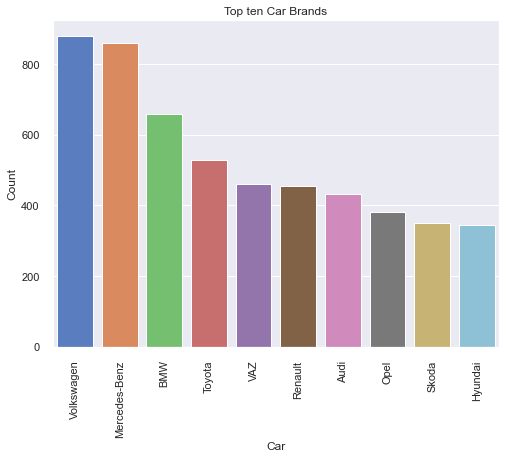

In [106]:
from collections import Counter
car_count = Counter(df['car'].dropna().tolist()).most_common(10)
car_idx = [car[0] for car in car_count]
car_val = [car[1] for car in car_count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = car_idx,y=car_val ,ax =ax)
plt.title('Top ten Car Brands')
plt.xlabel('Car')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

Text(0.5, 1.0, 'Pie chart showing the proportion of each Engine Type')

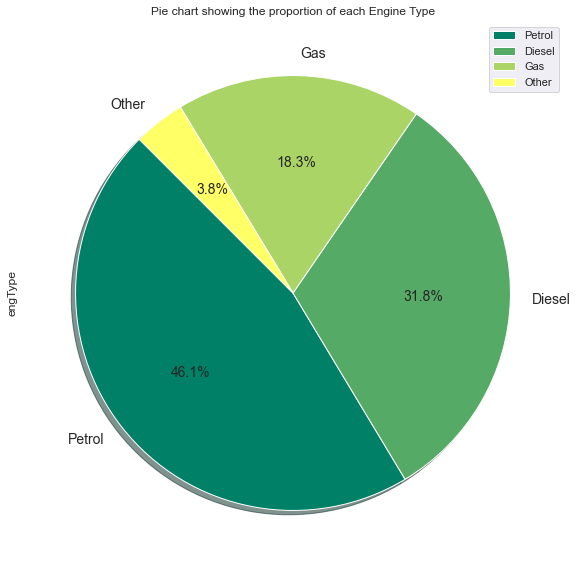

In [198]:
df['engType'].value_counts().plot(kind='pie', fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,10), shadow=True, startangle=135, legend=True, cmap='summer')

plt.ylabel('engType')
plt.title('Pie chart showing the proportion of each Engine Type')

Text(0.5, 1.0, 'Pie chart showing the proportion of each Body Type')

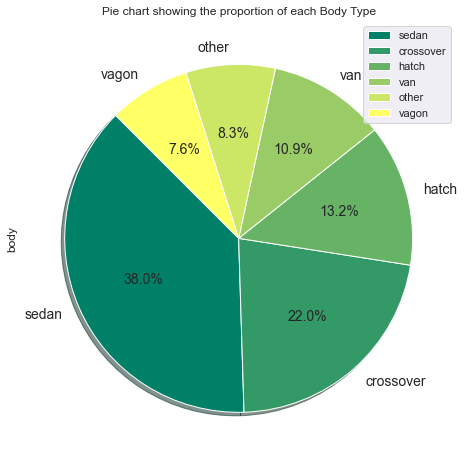

In [107]:
df['body'].value_counts().plot(kind='pie', fontsize=14, autopct='%3.1f%%', 
                                               figsize=(8,8), shadow=True, startangle=135, legend=True, cmap='summer')

plt.ylabel('body')
plt.title('Pie chart showing the proportion of each Body Type')

Text(0.5, 1.0, 'Pie chart showing the proportion of each Drive Types')

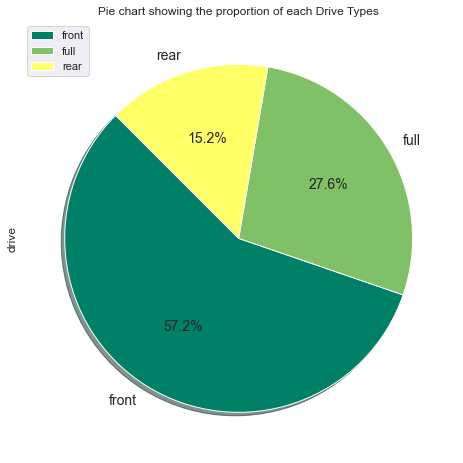

In [203]:
df['drive'].value_counts().plot(kind='pie', fontsize=14, autopct='%3.1f%%', 
                                               figsize=(8,8), shadow=True, startangle=135, legend=True, cmap='summer')

plt.ylabel('drive')
plt.title('Pie chart showing the proportion of each Drive Types')

In [213]:
df.sort_values(by='price', ascending=True).head(20)

car    price   body     mileage      engV engType  \
8308           Opel  500.000  sedan  139.226365  2.000000  Petrol   
9345           Opel  500.000  sedan  200.000000  2.000000  Petrol   
6422            GAZ  500.000  sedan  139.226365  2.000000   Other   
8969           Opel  510.000  vagon  200.000000  2.646344  Petrol   
7455            VAZ  537.225  sedan   87.000000  1.500000  Petrol   
8111  Moskvich-AZLK  550.000  sedan  130.000000  1.500000  Petrol   
7666  Moskvich-AZLK  550.000  sedan   30.000000  2.646344  Petrol   
3985         Toyota  600.000  sedan   10.000000  1.500000  Petrol   
9389            VAZ  600.000  sedan   60.000000  1.200000  Petrol   
6782           Opel  600.000  hatch   58.000000  1.300000  Petrol   
5183           Audi  600.000  sedan  112.000000  1.600000  Petrol   
8491            ZAZ  600.000  sedan  139.226365  1.100000  Petrol   
9363           Ford  620.000  hatch  139.226365  1.400000  Petrol   
1165            ZAZ  643.000  hatch   65.000000  1.200000     Gas   
9179            VAZ  649.000  sedan  139.226365  1.200000  Petrol   
3900            VAZ  650.000  sedan   17.000000  1.500000  Petrol   
4836            VAZ  650.000  sedan   10.000000  1.300000  Petrol   
8877            VAZ  666.900  sedan   70.000000  1.300000  Petrol   
7921            VAZ  670.000  sedan  139.226365  1.500000  Petrol   
7534           Ford  680.000  sedan  100.000000  2.300000     Gas   

     registration  year        model  drive  
8308          yes  1990        Omega   rear  
9345           no  1997     Vectra B  front  
6422          yes  1961           21   rear  
8969           no  1997     Vectra B  front  
7455          yes  1994         2105   rear  
8111          yes  1994         2141  front  
7666          yes  1971          412   rear  
3985          yes  1979      Corolla   rear  
9389          yes  1976         2101   rear  
6782          yes  1986       Kadett  front  
5183          yes  1980           80  front  
8491          yes  1993  1102 Òàâðèÿ  front  
9363          yes  1987       Escort  front  
1165          yes  1992  1102 Òàâðèÿ  front  
9179          yes  1977         2101   rear  
3900          yes  1988         2107   rear  
4836          yes  1982         2111   rear  
8877          yes  1983         2101   rear  
7921          yes  1987         2105   rear  
7534          yes  1980      Granada   rear

In [214]:
df.sort_values(by='price', ascending=False).head(20)

car     price       body     mileage      engV engType  \
7621        Bentley  547800.0      sedan  139.226365  2.646344  Petrol   
1611        Bentley  499999.0  crossover  139.226365  6.000000  Petrol   
7914        Bentley  499999.0  crossover  139.226365  6.000000  Petrol   
4134        Bentley  449999.0  crossover  139.226365  6.000000  Petrol   
5849  Mercedes-Benz  300000.0      other   37.000000  5.000000  Petrol   
2165  Mercedes-Benz  295000.0      sedan   29.000000  6.000000  Petrol   
1891  Mercedes-Benz  295000.0      sedan   29.000000  6.000000  Petrol   
8205     Land Rover  285000.0  crossover  139.226365  5.000000  Petrol   
1478        Bentley  259000.0      sedan  139.226365  6.000000  Petrol   
564   Mercedes-Benz  250000.0      other  139.226365  5.500000  Petrol   
567   Mercedes-Benz  249999.0      other  139.226365  5.500000  Petrol   
637         Bentley  222222.0      other  139.226365  6.000000  Petrol   
5074  Mercedes-Benz  222000.0  crossover  139.226365  6.300000  Petrol   
3909  Mercedes-Benz  219900.0  crossover   33.000000  5.500000  Petrol   
2343  Mercedes-Benz  219900.0  crossover   30.000000  6.300000  Petrol   
7370        Ferrari  205000.0      other   12.000000  4.500000  Petrol   
39    Mercedes-Benz  200000.0        van   19.000000  3.500000  Petrol   
2022  Mercedes-Benz  199999.0  crossover  139.226365  5.500000  Petrol   
4018  Mercedes-Benz  199999.0  crossover  139.226365  5.500000  Petrol   
1786  Mercedes-Benz  199999.0  crossover  139.226365  5.500000  Petrol   

     registration  year               model drive  
7621          yes  2016            Mulsanne  rear  
1611          yes  2016            Bentayga  full  
7914          yes  2016            Bentayga  full  
4134          yes  2016            Bentayga  full  
5849          yes  2012               G 500  full  
2165          yes  2011             S-Guard  rear  
1891          yes  2011               S 600  rear  
8205          yes  2016         Range Rover  full  
1478          yes  2014         Flying Spur  full  
564           yes  2016            S 63 AMG  full  
567           yes  2016            S 63 AMG  full  
637           yes  2015         Continental  full  
5074          yes  2016            S 63 AMG  full  
3909          yes  2013            G 63 AMG  full  
2343          yes  2013            G 63 AMG  full  
7370          yes  2012          458 Italia  rear  
39            yes  2013  Sprinter 324 ïàññ.  rear  
2022          yes  2016              GLS 63  full  
4018          yes  2016              GLS 63  full  
1786          yes  2016              GLS 63  full

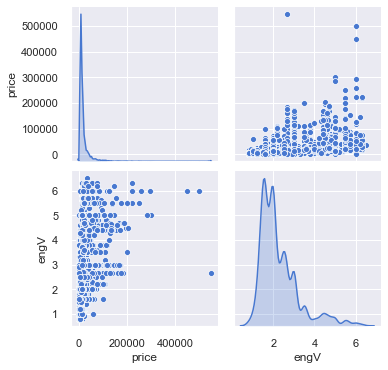

In [225]:
sns.pairplot(data=df[['price', 'engV', 'car', 'body']], size=2.5, diag_kind='kde')

Text(0.5, 1.0, 'Engine Type vs Price')

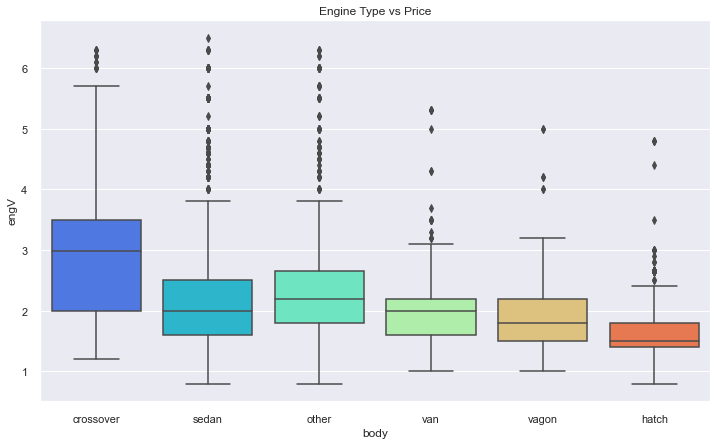

In [233]:
plt.figure(figsize=(12,7))
sns.boxplot(data=df, x='body', y='engV', palette='rainbow')

plt.title('Engine Type vs Price')

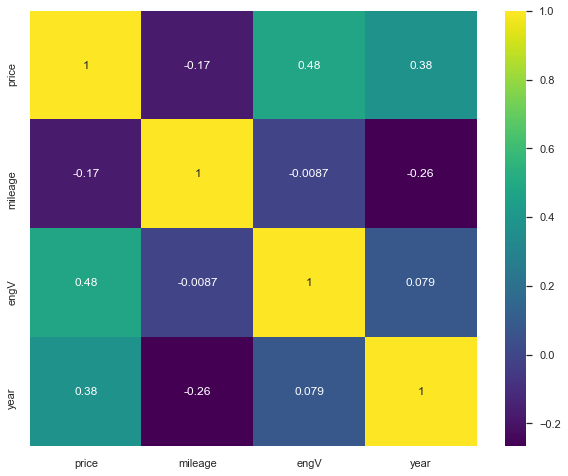

In [234]:
corr_mat = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, annot=True, cmap='viridis')

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9065 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9065 non-null   object 
 1   price         9065 non-null   float64
 2   body          9065 non-null   object 
 3   mileage       9065 non-null   float64
 4   engV          9065 non-null   float64
 5   engType       9065 non-null   object 
 6   registration  9065 non-null   object 
 7   year          9065 non-null   int64  
 8   model         9065 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 779.0+ KB


Text(0.5, 1.0, 'Line Chart to Show the Mean and Median prices of cars across the years')

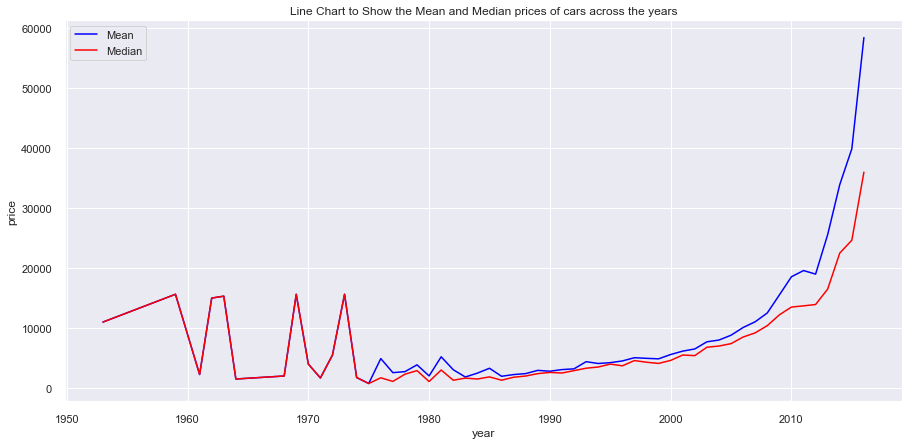

In [426]:
df.groupby(['year']).mean()['price'].plot(kind='line', figsize=(15, 7), color='blue')
df.groupby(['year']).median()['price'].plot(kind='line', figsize=(15, 7), color='red')

plt.xlabel('year')
plt.ylabel('price')
plt.legend(labels=('Mean', 'Median'))


plt.title('Line Chart to Show the Mean and Median prices of cars across the years')

Text(0.5, 1.0, 'Bar Chart to Show the count of cars sold across the years')

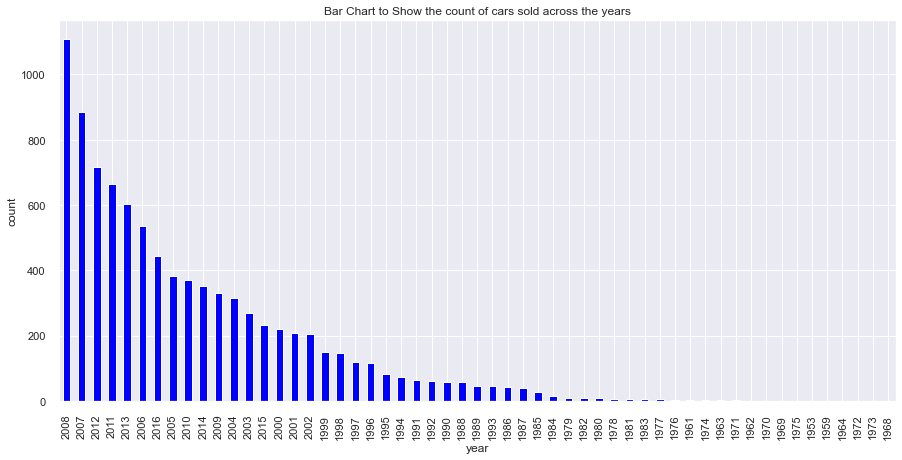

In [420]:
df['year'].value_counts().plot(kind='bar', figsize=(15, 7), color='blue')

plt.xlabel('year')
plt.ylabel('count')
plt.title('Bar Chart to Show the count of cars sold across the years')


In [446]:
yearlysales = df['year'].value_counts()
print(yearlysales)

2008    1110
2007     885
2012     718
2011     665
2013     604
2006     535
2016     445
2005     384
2010     370
2014     351
2009     330
2004     316
2003     269
2015     234
2000     221
2001     207
2002     206
1999     149
1998     148
1997     120
1996     116
1995      83
1994      73
1991      63
1992      61
1990      57
1988      57
1989      47
1993      45
1986      43
1987      39
1985      26
1984      15
1979       9
1982       9
1980       8
1978       7
1981       7
1983       6
1977       5
1976       4
1961       2
1974       2
1963       2
1971       2
1962       1
1970       1
1969       1
1975       1
1953       1
1959       1
1964       1
1972       1
1973       1
1968       1
Name: year, dtype: int64


Text(0.5, 1.0, 'Bar Chart to Show the count of cars sold across the years')

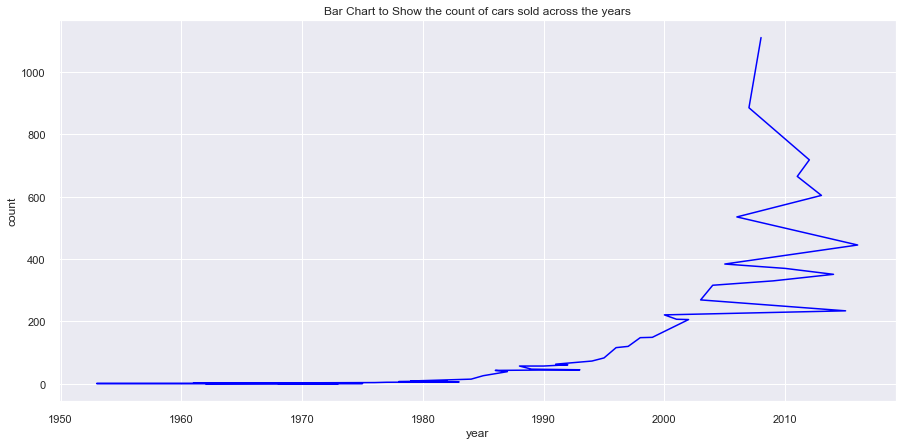

In [456]:
yearlysales.plot(kind = 'line', figsize=(15, 7), color='blue')
plt.xlabel('year')
plt.ylabel('count')
plt.title('Bar Chart to Show the count of cars sold across the years')


Text(0.5, 1.0, 'Histogram to Show the count of cars sold across the years')

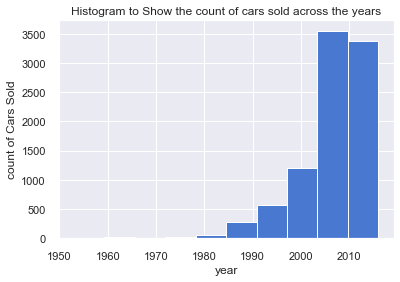

In [421]:
df.hist('year')
plt.xlabel('year')
plt.ylabel('count of Cars Sold')
plt.title('Histogram to Show the count of cars sold across the years')


In [276]:
topbrands = pd.concat([df.loc[df['car']=='Volkswagen'], df.loc[df['car']=='Mercedes-Benz'], df.loc[df['car']=='BMW']]).reset_index(drop=True)

There consists 2397 Cars from the top 3 brands in the data set 9065


In [478]:
topbrands.describe(include = 'all')

car          price   body      mileage         engV engType  \
count         2397    2397.000000   2397  2397.000000  2397.000000    2397   
unique           3            NaN      6          NaN          NaN       4   
top     Volkswagen            NaN  sedan          NaN          NaN  Diesel   
freq           879            NaN    985          NaN          NaN    1231   
mean           NaN   21878.221522    NaN   130.113262     2.589580     NaN   
std            NaN   29463.866472    NaN    40.041859     0.995947     NaN   
min            NaN    1199.000000    NaN    10.000000     1.000000     NaN   
25%            NaN    7300.000000    NaN   127.000000     2.000000     NaN   
50%            NaN   12799.000000    NaN   139.226365     2.200000     NaN   
75%            NaN   23500.000000    NaN   139.226365     3.000000     NaN   
max            NaN  300000.000000    NaN   200.000000     6.500000     NaN   

       registration         year    model drive  
count          2397  2397.000000     2397  2397  
unique            2          NaN      210     3  
top             yes          NaN  E-Class  rear  
freq           2162          NaN      185   908  
mean            NaN  2006.119733      NaN   NaN  
std             NaN     7.110816      NaN   NaN  
min             NaN  1978.000000      NaN   NaN  
25%             NaN  2001.000000      NaN   NaN  
50%             NaN  2007.000000      NaN   NaN  
75%             NaN  2012.000000      NaN   NaN  
max             NaN  2016.000000      NaN   NaN

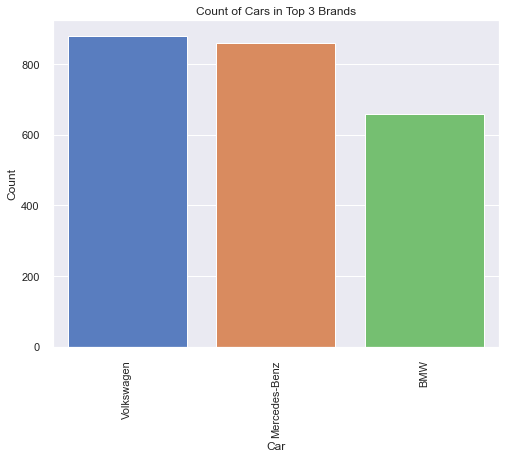

In [488]:
car_count = Counter(topbrands['car'].dropna().tolist()).most_common()
car_idx = [car[0] for car in car_count]
car_val = [car[1] for car in car_count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = car_idx,y=car_val ,ax =ax)
plt.title('Count of Cars in Top 3 Brands')
plt.xlabel('Car')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

Text(0.5, 1.0, 'Body Style Types for the top Selling Car Brands - Volkswagen, Mercedes-Benz and BMW')

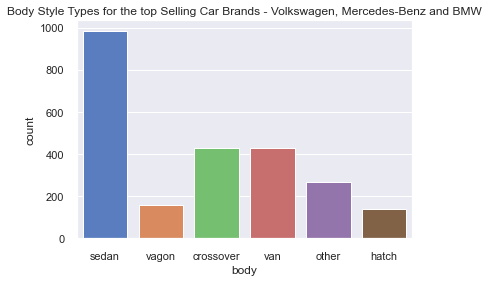

In [278]:
sns.countplot(topbrands['body']);
plt.xlabel('body')
plt.title('Body Style Types for the top Selling Car Brands - Volkswagen, Mercedes-Benz and BMW')


Text(0.5, 1.0, 'Pie chart showing the proportion of each brand for the Top 3 Brands')

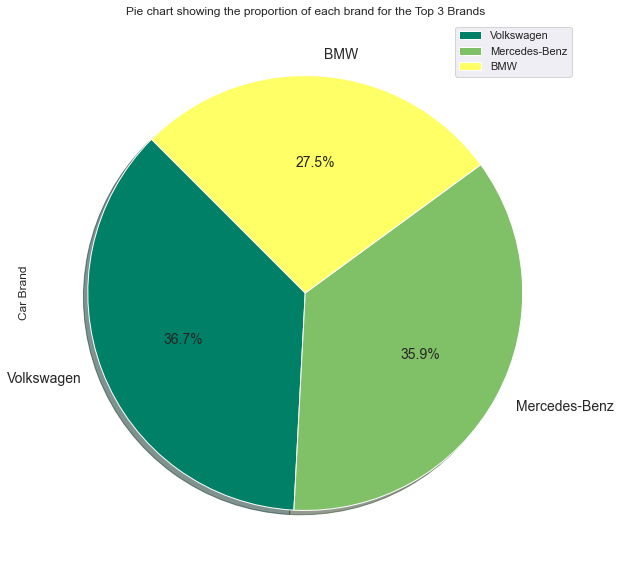

In [484]:
topbrands['car'].value_counts().plot(kind='pie', fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,10), shadow=True, startangle=135, legend=True, cmap='summer')

plt.ylabel('Car Brand')
plt.title('Pie chart showing the proportion of each brand for the Top 3 Brands')

Text(0.5, 1.0, 'Pie chart showing the proportion of each Engine Type for the Top 3 Brands')

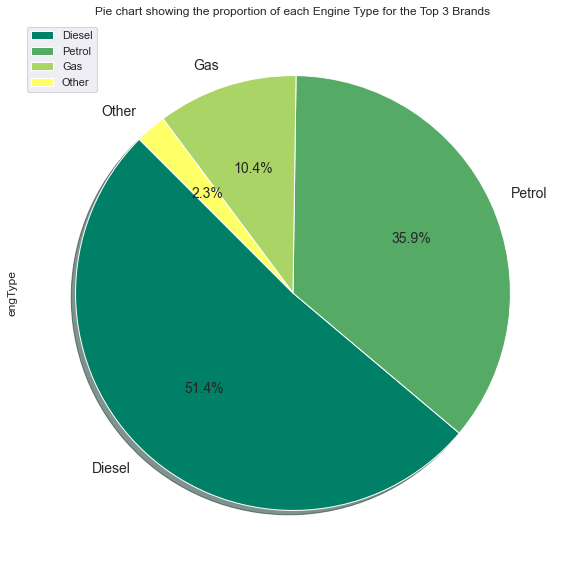

In [279]:
topbrands['engType'].value_counts().plot(kind='pie', fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,10), shadow=True, startangle=135, legend=True, cmap='summer')

plt.ylabel('engType')
plt.title('Pie chart showing the proportion of each Engine Type for the Top 3 Brands')

Text(0.5, 1.0, 'Pie chart showing the proportion of each Body Type for the Top 3 Brands')

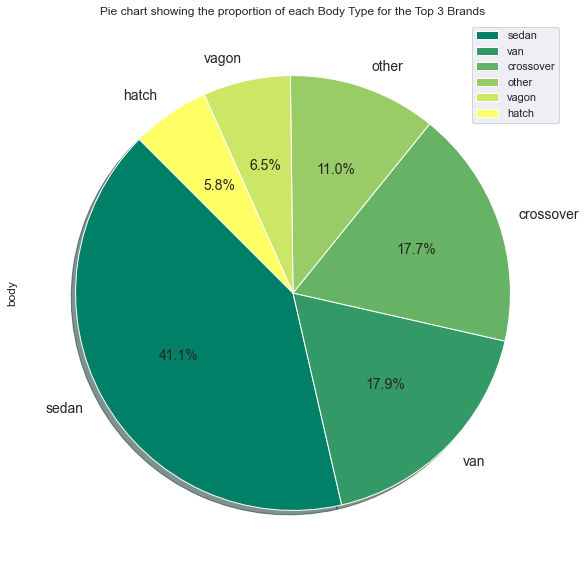

In [280]:
topbrands['body'].value_counts().plot(kind='pie', fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,10), shadow=True, startangle=135, legend=True, cmap='summer')

plt.ylabel('body')
plt.title('Pie chart showing the proportion of each Body Type for the Top 3 Brands')

Text(0.5, 1.0, 'Pie chart showing the proportion of the Drive Type for the top 3 Brands')

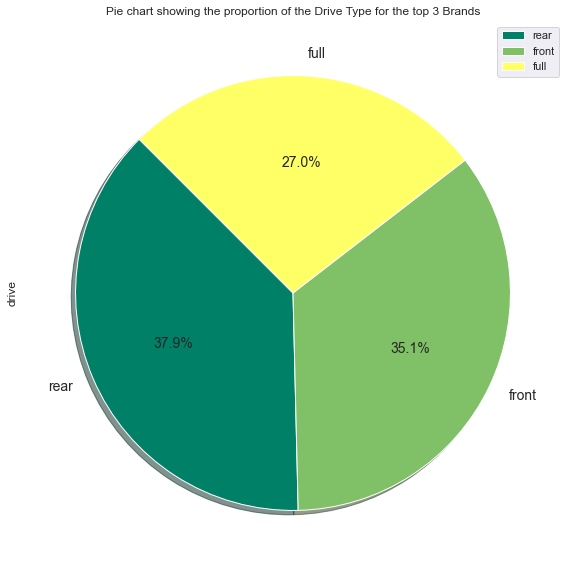

In [281]:
topbrands['drive'].value_counts().plot(kind='pie', fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,10), shadow=True, startangle=135, legend=True, cmap='summer')

plt.ylabel('drive')
plt.title('Pie chart showing the proportion of the Drive Type for the top 3 Brands')

Text(0.5, 1.0, 'Engine Type vs Price')

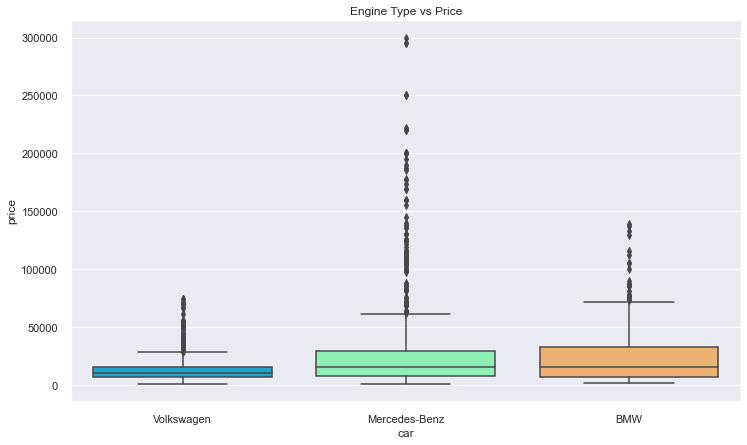

In [298]:
plt.figure(figsize=(12,7))
sns.boxplot(data=topbrands, x='car', y='price', palette='rainbow')

plt.title('Car Brand vs Price')

Text(0.5, 1.0, 'Violin Chart for the Price of Top 3 Brands')

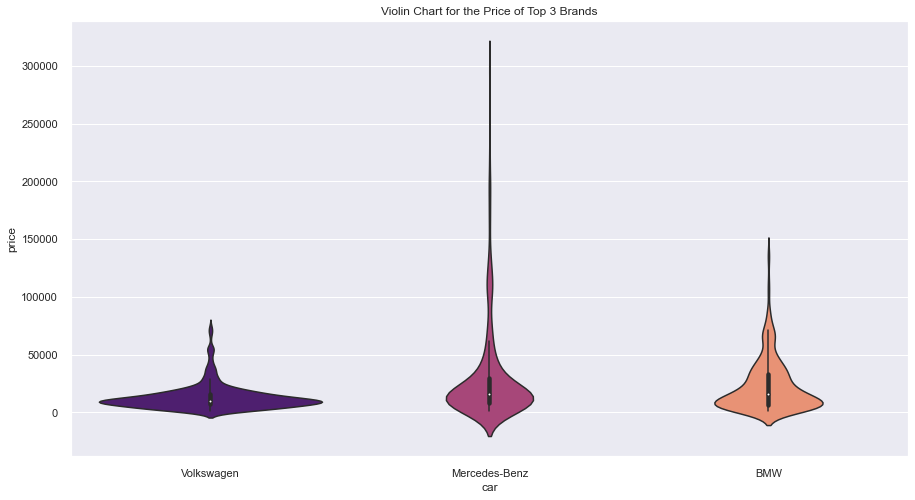

In [460]:
plt.figure(figsize=(15,8))
sns.violinplot(data=topbrands, x='car', y='price', palette='magma')
plt.title('Violin Chart for the Price of Top 3 Brands')

Text(0.5, 1.0, 'Histogram for Sale of top Brand Cars costing under $100,000')

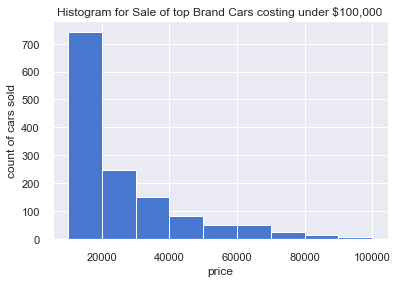

In [498]:
bins_list = [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
topbrands.hist('price', bins = bins_list)

plt.xlabel('price')
plt.ylabel('count of cars sold')
plt.title('Histogram for Sale of top Brand Cars costing under $100,000')

In [464]:
VW = pd.concat([df.loc[df['car']=='Volkswagen'].reset_index(drop=True)])

In [309]:
VW.describe(include = 'all')

car         price body     mileage        engV engType  \
count          879    879.000000  879  879.000000  879.000000     879   
unique           1           NaN    6         NaN         NaN       4   
top     Volkswagen           NaN  van         NaN         NaN  Diesel   
freq           879           NaN  259         NaN         NaN     496   
mean           NaN  13157.488203  NaN  133.027928    1.997602     NaN   
std            NaN  11060.394423  NaN   38.510651    0.526221     NaN   
min            NaN   1199.000000  NaN   10.000000    1.000000     NaN   
25%            NaN   6900.000000  NaN  123.500000    1.600000     NaN   
50%            NaN  10200.000000  NaN  139.226365    1.900000     NaN   
75%            NaN  15633.317316  NaN  148.000000    2.000000     NaN   
max            NaN  74500.000000  NaN  200.000000    5.000000     NaN   

       registration         year    model  drive  
count           879   879.000000      879    879  
unique            2          NaN       50      3  
top             yes          NaN  Touareg  front  
freq            812          NaN       64    744  
mean            NaN  2006.566553      NaN    NaN  
std             NaN     6.881180      NaN    NaN  
min             NaN  1982.000000      NaN    NaN  
25%             NaN  2003.000000      NaN    NaN  
50%             NaN  2008.000000      NaN    NaN  
75%             NaN  2012.000000      NaN    NaN  
max             NaN  2016.000000      NaN    NaN

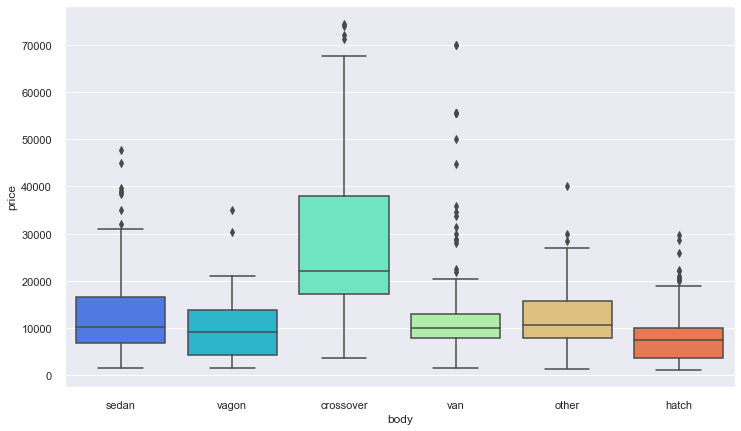

In [310]:
plt.figure(figsize=(12,7))
sns.boxplot(data=VW, x='body', y='price', palette='rainbow')

In [311]:
VW['price'].median()

10200.0

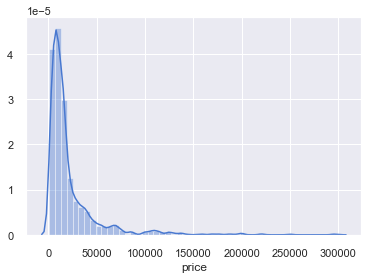

In [283]:
sns.set(color_codes=True)                                                
sns.set_palette(sns.color_palette("muted"))

sns.distplot(topbrands["price"])

In [479]:
year2008 = pd.concat([df.loc[df['year']==2008]]).reset_index(drop=True)

In [480]:
year2008.describe(include = 'all')

car          price   body      mileage         engV engType  \
count     1110    1110.000000   1110  1110.000000  1110.000000    1110   
unique      57            NaN      6          NaN          NaN       4   
top     Toyota            NaN  sedan          NaN          NaN  Petrol   
freq        90            NaN    429          NaN          NaN     586   
mean       NaN   12518.020788    NaN   124.445533     2.319211     NaN   
std        NaN    9589.071946    NaN    36.558219     0.996619     NaN   
min        NaN    1100.000000    NaN    16.000000     0.800000     NaN   
25%        NaN    7100.000000    NaN    99.250000     1.600000     NaN   
50%        NaN   10400.000000    NaN   128.000000     2.000000     NaN   
75%        NaN   15000.000000    NaN   148.000000     2.646344     NaN   
max        NaN  130000.000000    NaN   200.000000     6.500000     NaN   

       registration    year  model  drive  
count          1110  1110.0   1110   1110  
unique            2     NaN    287      3  
top             yes     NaN  Camry  front  
freq           1104     NaN     28    675  
mean            NaN  2008.0    NaN    NaN  
std             NaN     0.0    NaN    NaN  
min             NaN  2008.0    NaN    NaN  
25%             NaN  2008.0    NaN    NaN  
50%             NaN  2008.0    NaN    NaN  
75%             NaN  2008.0    NaN    NaN  
max             NaN  2008.0    NaN    NaN

In [491]:
year2008['price'].median()

10400.0

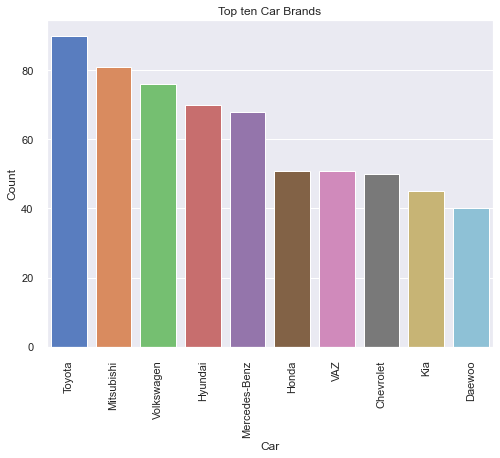

In [486]:
from collections import Counter
car_count = Counter(year2008['car'].dropna().tolist()).most_common(10)
car_idx = [car[0] for car in car_count]
car_val = [car[1] for car in car_count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = car_idx,y=car_val ,ax =ax)
plt.title('Top ten Car Brands')
plt.xlabel('Car')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

Text(0.5, 1.0, 'Pie chart showing the proportion of Each Body Type for Year 2008')

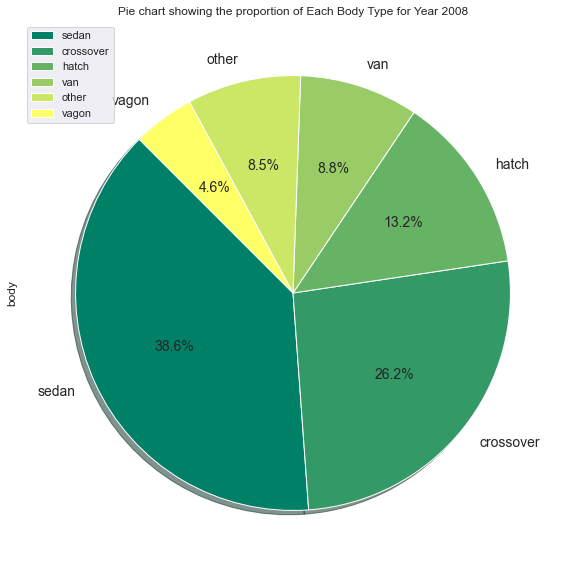

In [485]:
year2008['body'].value_counts().plot(kind='pie', fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,10), shadow=True, startangle=135, legend=True, cmap='summer')

plt.ylabel('body')
plt.title('Pie chart showing the proportion of Each Body Type for Year 2008')

Text(0.5, 1.0, 'Pie chart showing the proportion of each Engine Type sold in Year 2008')

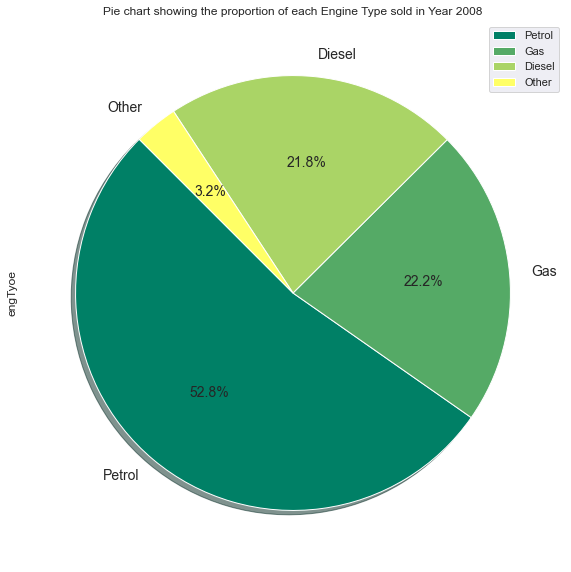

In [492]:
year2008['engType'].value_counts().plot(kind='pie', fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,10), shadow=True, startangle=135, legend=True, cmap='summer')

plt.ylabel('engTyoe')
plt.title('Pie chart showing the proportion of each Engine Type sold in Year 2008')

Text(0.5, 1.0, 'Pie chart showing the proportion of Drive Type sold in 2008')

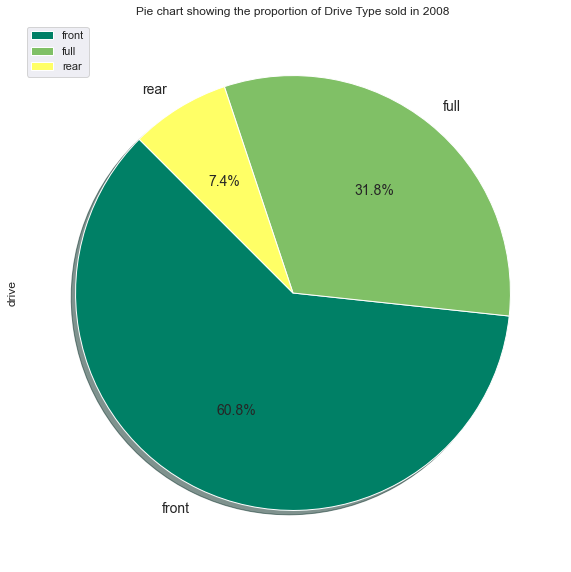

In [493]:
year2008['drive'].value_counts().plot(kind='pie', fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,10), shadow=True, startangle=135, legend=True, cmap='summer')

plt.ylabel('drive')
plt.title('Pie chart showing the proportion of Drive Type sold in 2008')

Text(0.5, 1.0, 'Price of Cars in 2008')

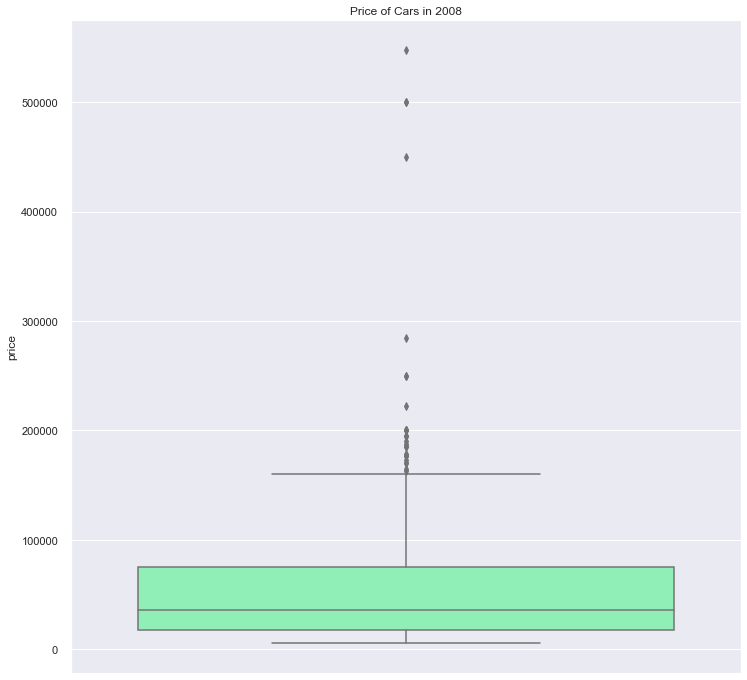

In [494]:
plt.figure(figsize=(12,12))
sns.boxplot(data=year2016, y='price', palette='rainbow')
plt.title('Price of Cars in 2008')

Text(0.5, 1.0, 'Histogram for Sale of Cars in 2008 costing under $100,000')

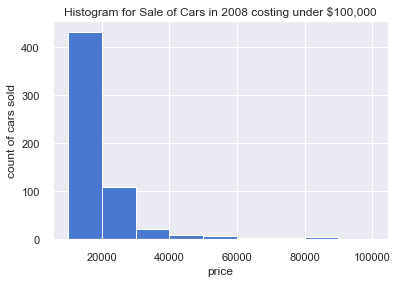

In [496]:
bins_list = [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
year2008.hist('price', bins = bins_list)

plt.xlabel('price')
plt.ylabel('count of cars sold')
plt.title('Histogram for Sale of Cars in 2008 costing under $100,000')

In [287]:
year2016 = pd.concat([df.loc[df['year']==2016]]).reset_index(drop=True)

In [477]:
year2016.describe(include = 'all')

car          price       body     mileage        engV  \
count             445     445.000000        445  445.000000  445.000000   
unique             37            NaN          6         NaN         NaN   
top     Mercedes-Benz            NaN  crossover         NaN         NaN   
freq               92            NaN        264         NaN         NaN   
mean              NaN   58451.138028        NaN  135.250196    2.590590   
std               NaN   64652.724877        NaN   21.414763    1.148078   
min               NaN    5500.000000        NaN   10.000000    0.900000   
25%               NaN   17639.467950        NaN  139.226365    1.700000   
50%               NaN   36000.000000        NaN  139.226365    2.200000   
75%               NaN   74999.000000        NaN  139.226365    3.000000   
max               NaN  547800.000000        NaN  139.226365    6.300000   

       engType registration    year model drive  
count      445          445   445.0   445   445  
unique       3            1     NaN   142     3  
top     Diesel          yes     NaN    X5  full  
freq       235          445     NaN    26   287  
mean       NaN          NaN  2016.0   NaN   NaN  
std        NaN          NaN     0.0   NaN   NaN  
min        NaN          NaN  2016.0   NaN   NaN  
25%        NaN          NaN  2016.0   NaN   NaN  
50%        NaN          NaN  2016.0   NaN   NaN  
75%        NaN          NaN  2016.0   NaN   NaN  
max        NaN          NaN  2016.0   NaN   NaN

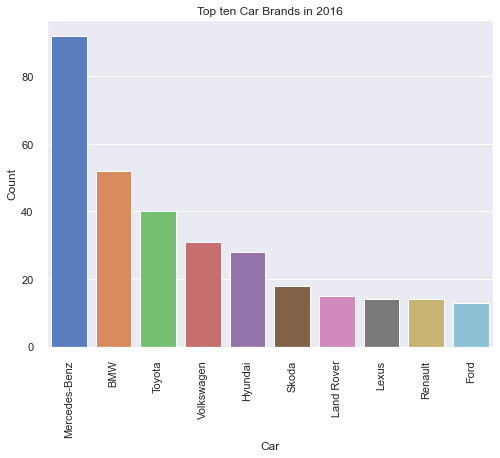

In [497]:
car_count = Counter(year2016['car'].dropna().tolist()).most_common(10)
car_idx = [car[0] for car in car_count]
car_val = [car[1] for car in car_count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = car_idx,y=car_val ,ax =ax)
plt.title('Top ten Car Brands in 2016')
plt.xlabel('Car')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

Text(0.5, 1.0, 'Pie chart showing the proportion of each Body Type sold in 2016')

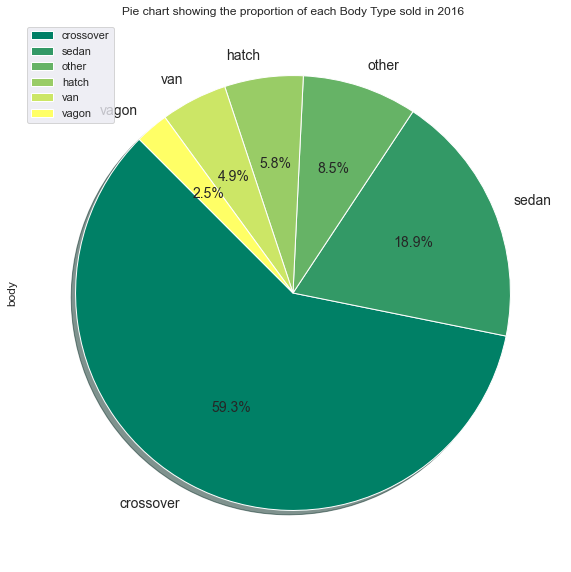

In [290]:
year2016['body'].value_counts().plot(kind='pie', fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,10), shadow=True, startangle=135, legend=True, cmap='summer')

plt.ylabel('body')
plt.title('Pie chart showing the proportion of each Body Type sold in 2016')

Text(0.5, 1.0, 'Pie chart showing the proportion of Engine Type sold in 2016')

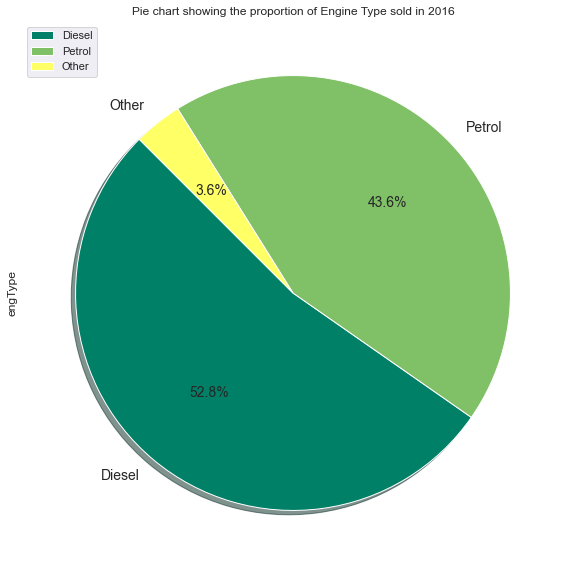

In [291]:
year2016['engType'].value_counts().plot(kind='pie', fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,10), shadow=True, startangle=135, legend=True, cmap='summer')

plt.ylabel('engType')
plt.title('Pie chart showing the proportion of Engine Type sold in 2016')

Text(0.5, 1.0, 'Pie chart showing the proportion of Drive Type sold in 2016')

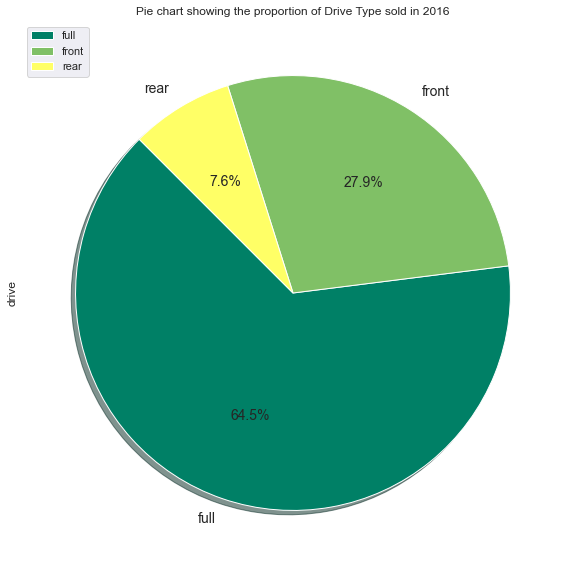

In [292]:
year2016['drive'].value_counts().plot(kind='pie', fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,10), shadow=True, startangle=135, legend=True, cmap='summer')

plt.ylabel('drive')
plt.title('Pie chart showing the proportion of Drive Type sold in 2016')

Text(0.5, 1.0, 'Price of Cars in 2016')

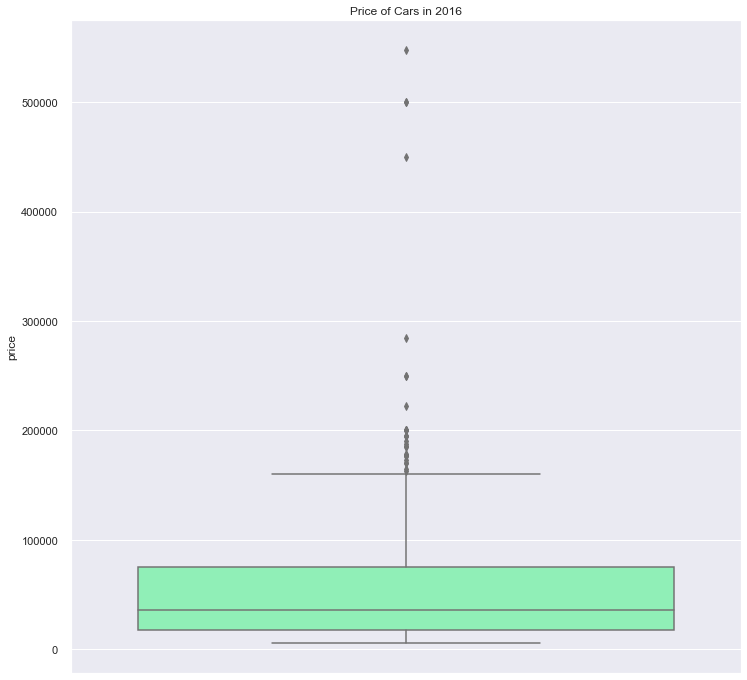

In [418]:
plt.figure(figsize=(12,12))
sns.boxplot(data=year2016, y='price', palette='rainbow')
plt.title('Price of Cars in 2016')

Text(0.5, 1.0, 'Histogram for Sale of Cars in 2016 costing under $100,000')

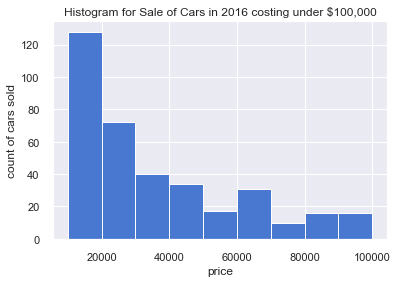

In [475]:
bins_list = [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
year2016.hist('price', bins = bins_list)

plt.xlabel('price')
plt.ylabel('count of cars sold')
plt.title('Histogram for Sale of Cars in 2016 costing under $100,000')

In [339]:
df['price'].median()

9900.0

In [429]:
df['price'].mean()

16229.73726555087

In [295]:
topbrands['price'].median()

12799.0

In [293]:
year2016['price'].median()

36000.0

CONCLUSION:

Overall Data (1953 – 2016)
Sedans with a Petrol Engine and having a front wheel drive car has sold most historically
Most cars are sold with the price in the range of $10,000. 

Since the data is spread over many years the price analysis needs to be adjusted to Inflation or Time Value of Money to understand the Mean and Median price in today’s $ value.

Sales of Top Selling Cars Brands (Volkswagen, Mercedes Benz, BMW)
Although Sedans are top selling body type, there is a good proportion of Vans which is almost similar to Crossovers from these brands
As most cross overs and Vans have Diesel Engines the data for the Top Brands shows a higher proportion of Diesel cars
Our study of the Top Brands has been for the entire period. The buying patterns have changed in recent years. In spite of the change in buying patterns the Top Selling Brands still feature at the top of the list for cars sold lately
 


Sales of cars in the year with Maximum Sales  - 2008
The top selling car brands are Toyota, Mitsubishi, Volkswagen
The mean and median of prices of cars sold is close to each other in the range of $10,000 - $12,000
The attributes of the most cars sold in 2008 mirrors that of the overall sales – Sedans with Petrol Engines having a front wheel drive system

Sales of cars in the most recent Year  - 2016
Sales of cars has declined as compared to the year 2008 Factors such as Dip in Economy and rise of App Based Ride Sharing Platforms – Uber, Lyft, etc.. are the probable contributors for this trend
The top selling cars are from Luxury Brands – Mercedes Benz and BMW
Major Shift in buying pattern with a preference for Crossover Cars
All Wheel Drive Cars constitute 64% of all cars sold in 2016

Price Analysis:
All Cars Sold in the Data (1953 - 2016):
Mean Price: $9,900
Median Price: $16,229

Top 3 Car Brands (VW, Mercedes Benz and BMW):
Mean Price: $21,878
Median Price: $12,799

Year 2008 Sales:
Mean Price: $12,518
Median Price: $10,400


Year 2016 Sales:
Median Price: $58,451
Mean Price: $36,000


Sales have dipped after 2008, however in 2016 we observe that the average price of cars sold has gone up considerably. It is possible that most people are not buying commuter cars lately but are buying high end cars for performance, luxury and lifestyle.